In [18]:
import pandas as pd # type: ignore
import numpy as np
import matplotlib as plot # type: ignore

In [19]:
df_store = df = pd.read_csv("../data/deliveries.csv")
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [20]:
# different types of extras

df['extras_type'].value_counts()

extras_type
wides      7651
legbyes    3778
noballs    1000
byes        628
penalty       2
Name: count, dtype: int64

In [21]:
# replace "Rising Pune Supergiant" with "Rising Pune Supergiants" as both are same

df.loc[df['batting_team'] == "Rising Pune Supergiant", 'batting_team'] = 'Rising Pune Supergiants'
df.loc[df['bowling_team'] == "Rising Pune Supergiant", 'bowling_team'] = 'Rising Pune Supergiants'

In [22]:
# bowler who has bowled most balls in ipl

round(df['bowler'].value_counts().head(10))

bowler
R Ashwin           4333
SP Narine          3812
B Kumar            3703
PP Chawla          3680
RA Jadeja          3610
Harbhajan Singh    3496
A Mishra           3432
DJ Bravo           3296
YS Chahal          3266
UT Yadav           3061
Name: count, dtype: int64

In [23]:
# Assuming df is your DataFrame with columns 'batter' and 'non_striker'

# Count the number of balls faced by each batter
batter_counts = df['batter'].value_counts()

# Count the number of balls faced by each non-striker
non_striker_counts = df['non_striker'].value_counts()

# Sum the counts of balls faced by each player
total_balls_faced = batter_counts.add(non_striker_counts, fill_value=0)

total_balls_faced.sort_values(ascending=False).head()

V Kohli      11296.0
S Dhawan     11194.0
RG Sharma     9824.0
DA Warner     9257.0
SK Raina      8486.0
Name: count, dtype: float64

In [24]:
# most balls in an over

max_balls_index = df["ball"].idxmax()
max_balls_row = df.loc[max_balls_index]

print("Bowler with the maximum balls in an over:")
print(df[(df["match_id"] == 1359479) & (df['over'] == 18)]['extras_type'])

Bowler with the maximum balls in an over:
227030      NaN
227031      NaN
227032    wides
227033    wides
227034    wides
227035    wides
227036      NaN
227037      NaN
227038    wides
227039      NaN
227040      NaN
Name: extras_type, dtype: object


In [25]:
# different types of dismisal in ipl

df['dismissal_kind'].value_counts()

dismissal_kind
caught                   7437
bowled                   2089
run out                  1062
lbw                       750
caught and bowled         349
stumped                   345
retired hurt               15
hit wicket                 15
retired out                 3
obstructing the field       2
Name: count, dtype: int64

In [26]:
# most dismissed batsman

df["player_dismissed"].value_counts().head()

player_dismissed
RG Sharma     210
V Kohli       195
S Dhawan      188
RV Uthappa    180
KD Karthik    175
Name: count, dtype: int64

In [27]:
# Filter the DataFrame based on the condition
wides_df = df[df['extras_type'] == 'wides']

# Group by the bowler and count the number of wides bowled by each bowler
bowler_wides_count = wides_df.groupby('bowler').size()

# Find the bowler who has bowled the most wides
most_wides_bowler = bowler_wides_count.idxmax()
most_wides_count = bowler_wides_count.max()

print(f"The bowler who has bowled the most wides is {most_wides_bowler} with {most_wides_count} wides.")


The bowler who has bowled the most wides is DJ Bravo with 167 wides.


In [28]:
# Filter the DataFrame based on the condition
noballs_df = df[df['extras_type'] == 'noballs']

# Group by the bowler and count the number of wides bowled by each bowler
bowler_noballs_count = noballs_df.groupby('bowler').size()

bowler_noballs_count.sort_values(ascending=False).head()

bowler
JJ Bumrah      29
UT Yadav       23
S Sreesanth    23
I Sharma       22
A Mishra       21
dtype: int64

In [29]:
df[df["dismissal_kind"] == "hit wicket"].head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
2358,335991,2,Mumbai Indians,Kings XI Punjab,17,2,MA Khote,S Sreesanth,DS Kulkarni,0,0,0,NaN,1,MA Khote,hit wicket,NaN
8031,336016,1,Royal Challengers Bangalore,Kings XI Punjab,4,6,Misbah-ul-Haq,S Sreesanth,V Kohli,0,0,0,NaN,1,Misbah-ul-Haq,hit wicket,NaN
18029,392202,2,Rajasthan Royals,Chennai Super Kings,5,3,SA Asnodkar,JA Morkel,RJ Quiney,0,0,0,NaN,1,SA Asnodkar,hit wicket,NaN
59825,548311,1,Chennai Super Kings,Deccan Chargers,17,2,RA Jadeja,DW Steyn,DJ Bravo,0,0,0,NaN,1,RA Jadeja,hit wicket,NaN
72773,548367,1,Royal Challengers Bangalore,Mumbai Indians,6,3,SS Tiwary,Harbhajan Singh,TM Dilshan,0,0,0,NaN,1,SS Tiwary,hit wicket,NaN


In [30]:
df[df['dismissal_kind'] == 'bowled']['bowler'].value_counts().head()

bowler
SL Malinga    63
PP Chawla     48
SP Narine     46
RA Jadeja     39
B Kumar       38
Name: count, dtype: int64

In [31]:
df[df["dismissal_kind"] == "caught and bowled"]["bowler"].value_counts().head()

bowler
Harbhajan Singh    11
DJ Bravo           11
SP Narine           8
RA Jadeja           7
Kuldeep Yadav       7
Name: count, dtype: int64

## Highest scorer against each team

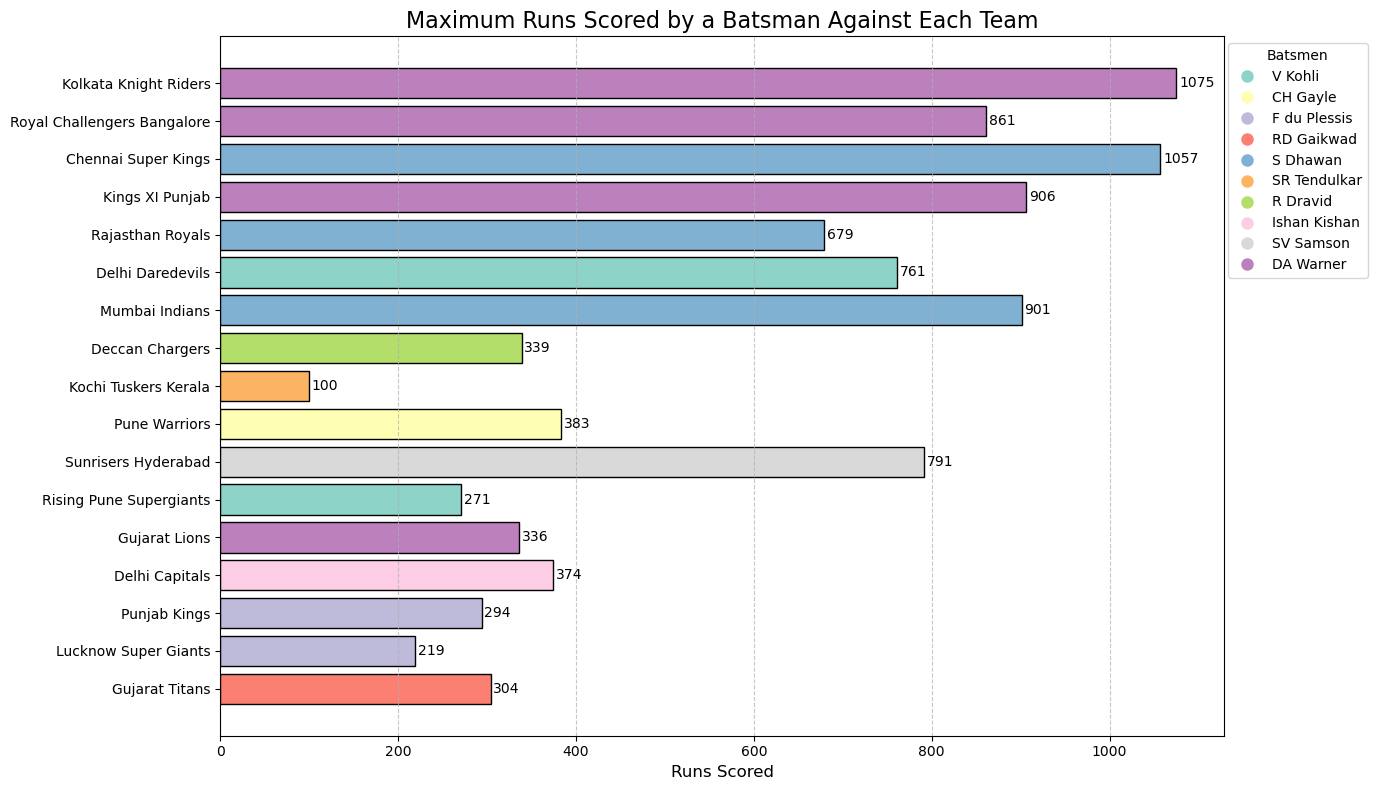

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

uniq_batters = df["batter"].unique()
uniq_teams = df["batting_team"].unique()

runs_matrix = pd.pivot_table(
    df, values="batsman_runs", index="batter", columns="bowling_team", aggfunc="sum"
)

runs_matrix = runs_matrix.fillna(0)

runs_matrix = runs_matrix.reindex(columns=uniq_teams)

teams = []
max_runs_batsmen = []
max_runs_values = []

for team in runs_matrix.columns:
    max_runs_batsman = runs_matrix.loc[runs_matrix[team].idxmax()].name
    max_runs = runs_matrix.loc[runs_matrix[team].idxmax()][team]

    teams.append(team)
    max_runs_batsmen.append(max_runs_batsman)
    max_runs_values.append(max_runs)

unique_batsmen = list(set(max_runs_batsmen))
palette = sns.color_palette("Set3", len(unique_batsmen))
batsman_colors = {batsman: palette[i] for i, batsman in enumerate(unique_batsmen)}

plt.figure(figsize=(14, 8))
colors = [batsman_colors[batsman] for batsman in max_runs_batsmen]
bars = plt.barh(teams, max_runs_values, color=colors, edgecolor="black")

for bar in bars:
    plt.text(
        bar.get_width() + 3,
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width())}",
        va="center",
        ha="left",
        fontsize=10,
        color="black",
    )

handles = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor=batsman_colors[batsman],
        markersize=10,
        label=batsman,
    )
    for batsman in unique_batsmen
]
plt.legend(
    handles=handles, title="Batsmen", loc="upper right", bbox_to_anchor=(1.15, 1)
)

plt.xlabel("Runs Scored", fontsize=12)
plt.title("Maximum Runs Scored by a Batsman Against Each Team", fontsize=16)
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

## Most Runouts in IPL
- Player
- Team

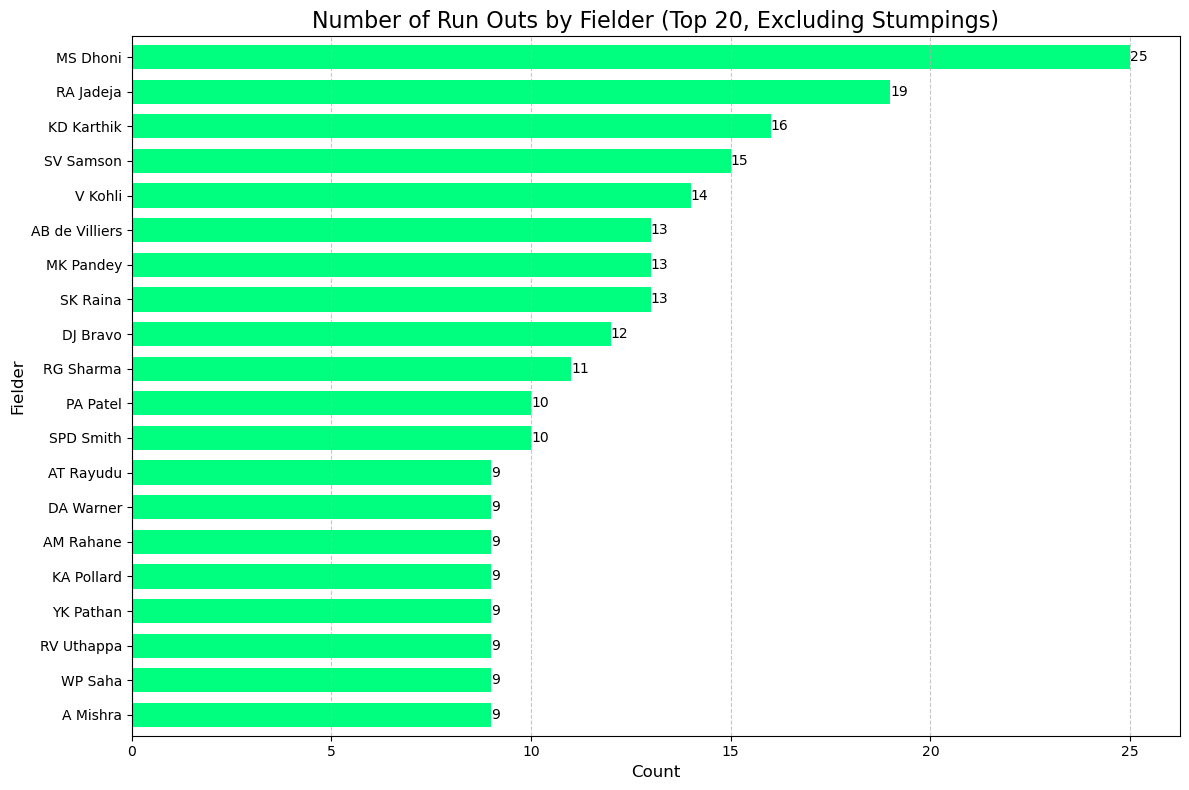

In [33]:
from matplotlib import pyplot as plt

# Get the count of run outs by fielder
run_out_fielder_counts = (
    df[df["dismissal_kind"] == "run out"]["fielder"]
    .value_counts()
    .head(20)
    .sort_values(ascending=True)  # Sort in ascending order
)

plt.figure(figsize=(12, 8))
bars = run_out_fielder_counts.plot(
    kind="barh", color="springgreen", width=0.7
)  # Adjust bar width

# Add labels to the bars
for bar in bars.patches:
    plt.text(
        bar.get_width(),  # Adjust the position of the text
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width())}",
        ha="left",
        va="center",
        fontsize=10,  # Increase font size
    )

plt.xlabel("Count", fontsize=12)  # Increase font size
plt.ylabel("Fielder", fontsize=12)  # Increase font size
plt.title(
    "Number of Run Outs by Fielder (Top 20, Excluding Stumpings)", fontsize=16
)  # Increase font size
plt.xticks(fontsize=10)  # Increase font size
plt.yticks(fontsize=10)  # Increase font size
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Add grid lines
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

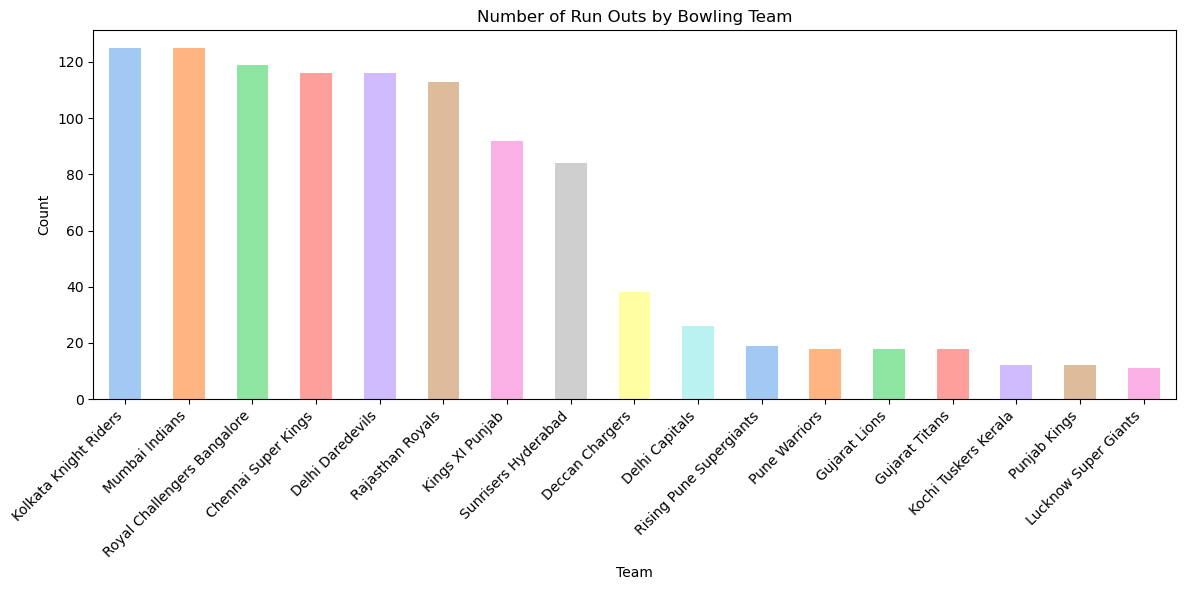

In [34]:
from matplotlib import pyplot as plt

# Get the counts of run outs by bowling team
run_out_teams_counts = (
    df[df["dismissal_kind"] == "run out"]["bowling_team"]
    .value_counts()
    .head(25)
    .sort_values(ascending=False)
)

# Use a color palette that is more suitable for visualization
colors = sns.color_palette("pastel")

plt.figure(figsize=(12, 6))  # Adjust the figure size for better visibility
run_out_teams_counts.plot(kind="bar", color=colors)
plt.xlabel("Team")
plt.ylabel("Count")
plt.title("Number of Run Outs by Bowling Team")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

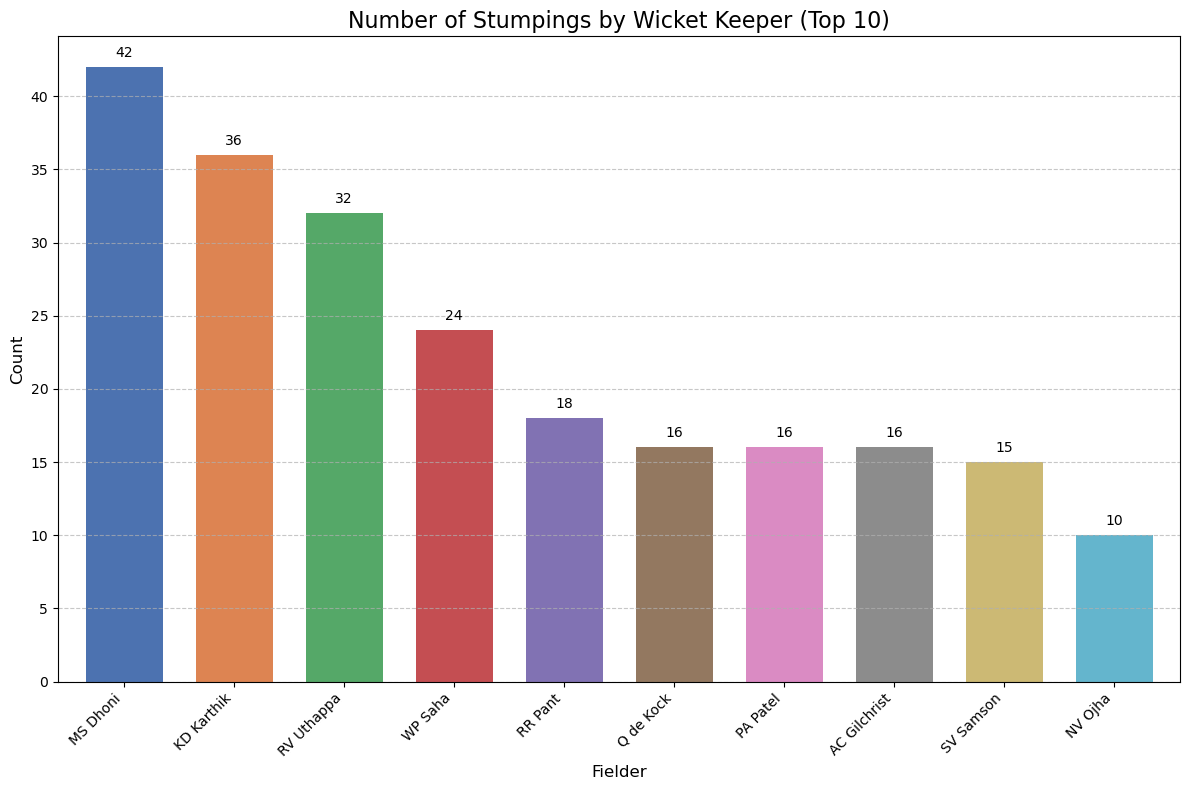

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns

# Filter the DataFrame for stumped dismissals and count the occurrences by fielder
stumped_fielder_counts = (
    df[(df["is_wicket"] == 1) & (df["dismissal_kind"] == "stumped")]["fielder"]
    .value_counts()
    .head(10)
)

# Use Seaborn's color palette for better visualization
colors = sns.color_palette("deep")

plt.figure(figsize=(12, 8))
bars = stumped_fielder_counts.plot(
    kind="bar", color=colors, width=0.7
)  # Increase bar width

# Add values on top of bars
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,  # Adjust the position of the text
        f"{int(bar.get_height())}",
        ha="center",
        va="bottom",
    )

plt.xlabel("Fielder", fontsize=12)  # Increase font size
plt.ylabel("Count", fontsize=12)  # Increase font size
plt.title(
    "Number of Stumpings by Wicket Keeper (Top 10)", fontsize=16
)  # Increase font size
plt.xticks(
    rotation=45, ha="right", fontsize=10
)  # Rotate x-axis labels and increase font size
plt.yticks(fontsize=10)  # Increase font size
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add grid lines
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## Players that have played for the most teams

In [36]:
# Merge unique teams from both batting and bowling columns for each player
batting_teams = df.groupby("batter")["batting_team"].unique()
bowling_teams = df.groupby("bowler")["bowling_team"].unique()

all_teams = pd.concat([batting_teams, bowling_teams])

# Count the number of unique teams for each player
unique_teams_count = all_teams.apply(lambda x: len(set(x)))

# Sort players based on the number of unique teams they have played for
most_unique_teams = unique_teams_count.sort_values(ascending=False)

# Display the top players who have played for the most number of unique teams
top_players = most_unique_teams.head()

# Print top players and their respective teams
for player, teams_count in top_players.items():
    print(f"Player: {player}")
    teams = ", ".join(str(team) for team in all_teams[player])
    print(f"Number of Unique Teams: {teams_count}")
    print()

Player: AJ Finch
Number of Unique Teams: 9

Player: MK Pandey
Number of Unique Teams: 7

Player: JD Unadkat
Number of Unique Teams: 7

Player: NLTC Perera
Number of Unique Teams: 6

Player: PA Patel
Number of Unique Teams: 6



In [37]:
df.head()


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


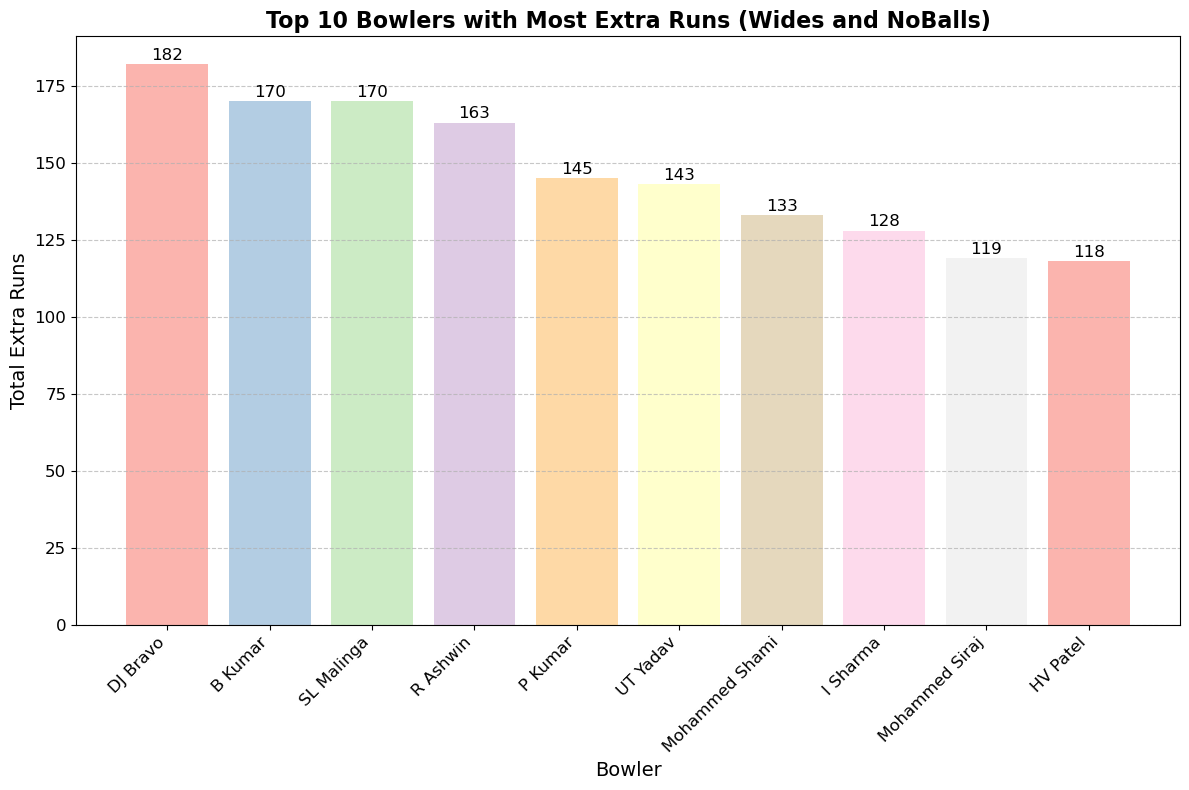

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assuming df is your DataFrame
# Filter the DataFrame for wides and noballs
filtered_df = df[df["extras_type"].isin(["wides", "noballs"])]

# Calculate the total extra runs for each bowler using groupby and sum
bl_extras = filtered_df.groupby("bowler")["extra_runs"].sum()

# Get the top 10 bowlers with the most extra runs
top_bowlers = bl_extras.sort_values(ascending=False).head(10)

# Define a pastel color palette with 10 colors
pastel_colors = ListedColormap(plt.cm.Pastel1.colors[:10])

# Plotting the results
plt.figure(figsize=(12, 8))
bars = plt.bar(top_bowlers.index, top_bowlers.values, color=pastel_colors.colors)

# Adding title and labels
plt.title(
    "Top 10 Bowlers with Most Extra Runs (Wides and NoBalls)",
    fontsize=16,
    fontweight="bold",
)
plt.xlabel("Bowler", fontsize=14)
plt.ylabel("Total Extra Runs", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

# Adding grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.5,
        int(yval),
        ha="center",
        va="bottom",
        fontsize=12,
    )

# Show the plot
plt.tight_layout()
plt.show()

In [39]:
df_powerplay = df[(0 <= df['over']) & (df['over'] <= 6)]

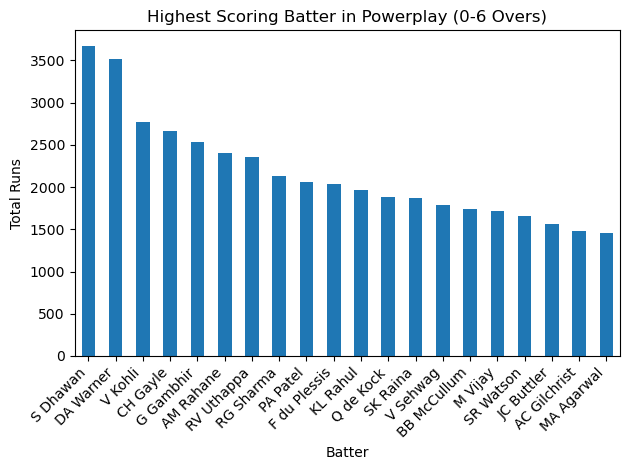

In [40]:
import matplotlib.pyplot as plt

highest_scoring_batter = (
    df_powerplay.groupby("batter")["batsman_runs"]
    .sum()
    .sort_values(ascending=False)
    .head(20)
)
highest_scoring_batter.plot(kind="bar")
plt.xlabel("Batter")
plt.ylabel("Total Runs")
plt.title("Highest Scoring Batter in Powerplay (0-6 Overs)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()